# 신경망 학습

**학습** (Learning)과 이를 가능하게 해주는 지표 **손실함수** (Loss Function)에 대해 다룬다.

## 4.1 데이터에서 학습하기

머신러닝의 핵심은 데이터로부터 배우기. 패턴 인식이라고 하기도 한다. 이미지의 '특징' (feature)

기존 컴퓨터 비전의 방식은 SIFT, HOG 등으로 데이터를 벡터화 시킨 뒤 기계학습에 넣는 방법이었는데, 딥러닝은 이미지의 픽셀 단위로 입력하여 있는 그대로 학습하는 특징을 가진다.

## 4.2 Loss Function

신경망 학습 (기계학습도 동일)의 핵심이 되는 것은 손실함수다. 가중치 (파라미터)를 변형시켜가는 과정에서 그 선택의 기준이 되어주기 때문이다. 일반적으로 사용하는 손실함수는 평균 제곱 오차 (MSE)와 교차 엔트로피 오차 (Cross-Entropy)이다.

일반적인 정형 데이터 셋과 다르게, k는 데이터의 차원 수를 의미한다. 가령, 0~9값을 맞추는 MNIST dataset의 정답 차원수는 10차원이다.

** MSE **

$$
E=\frac{1}{2}\sum_k (y_k-t_k)^2
$$

직관적으로도 이해하기 쉬운 손실함수로 이를 코드로 구현하면 다음과 같다.

In [1]:
import numpy as np

In [2]:
def MSE(y_pred, y_true):
    return 0.5 * np.sum((y_true-y_pred)**2)

MNIST dataset이 각 숫자를 나타낼 확률

In [3]:
y_true = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y_pred = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])

In [4]:
MSE(y_pred, y_true)

0.09750000000000003

In [5]:
y_pred = np.array([0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0])

In [6]:
MSE(y_pred, y_true)

0.5975

여기서의 정답은 '2'인데, 밑의 경우는 '2'일 확률을 훨씬 낮게 잡았기 때문에 MSE가 높다.

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
mean_squared_error(y_true, y_pred)

0.11950000000000001

scikit learn 에서는 k를 차원이라고 계산하지 않고, 데이터의 수라고 고려하기 때문에 평균을 구해버린다.

**Cross-Entropy**

$$
E=-\sum_k t_k\log y_k
$$

$t_k$는 0 또는 1의 값을 가지고 $y_k$는 0과 1 사이의 값을 가진다. 따라서, $t_k$가 0의 값을 가지는 경우는 계산이 되지 않는다.

In [9]:
def cross_entropy(y_pred, y_true):
    delta = 1e-7
    return -np.sum(y_true * np.log(y_pred+delta))

In [10]:
y_true = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y_pred = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0])

In [11]:
cross_entropy(y_pred, y_true)

0.510825457099338

In [12]:
y_pred = np.array([0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0])

In [13]:
cross_entropy(y_pred, y_true)

2.302584092994546

In [14]:
-1 * np.log(0.6 + 1e-7)

0.510825457099338

In [15]:
-1 * np.log(0.1 + 1e-7)

2.302584092994546

label이 0인 값들은 전혀 계산에 반영되지 않은 것을 확인할 수 있다.

#### 4.2.3 미니배치 학습
$$E = -\frac{1}{N} \sum_{n} \sum_{k} t_k\log y_k$$

In [1]:
# 데이터셋을 읽어옴
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
    
print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [3]:
# 무작위로 10개 추출
print(np.random.choice(60000, 10))

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size, replace=False)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch)
print(t_batch)

[19364 24642 12307 43450 40356 38164 12730 44117 19948 17012]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [93]:
x_batch[0].shape

(784,)

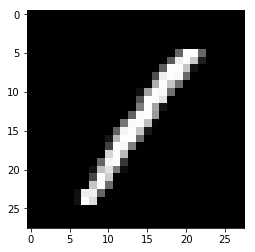

In [28]:
plt.imshow(x_batch[0].reshape(28,28), cmap='gray')
plt.show()

In [4]:
# 0과 1의 원-핫 인코딩일 경우의 교차 엔트로피
def cross_entropy_error(y, t):
    if y.ndim == 1: # y가 1차원, 데이터 하나당 교차 엔트로피의 오차를 구하는 경우는 reshape
        t = t.reshape(1, t.size) # 정답 레이블 
        y = t.reshape(1, y.size) # 신경망 출력
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size # 배치의 크기만큼 정규화해서 교차 엔트로피를 계산

In [5]:
# 숫자 레이블일 경우의 교차 엔트로피
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size # 레이블일 때는 레이블에 해당하는 바로 읽고 정규화

### 4.4 기울기
$$\left(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}\right)$$

In [11]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [12]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        zxh1 = f(x)
        v = x[idx]
        x[idx] = v + h
        fxh1 = f(x)
        
        x[idx] = v - h
        fxh2 = f(x)
    
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = v
        
    return grad

In [13]:
grad1 = numerical_gradient(function_2, np.array([3.0, 4.0]))
grad2 = numerical_gradient(function_2, np.array([0.0, 2.0]))
grad3 = numerical_gradient(function_2, np.array([3.0, 0.0]))

In [14]:
print(grad1)
print(grad2)
print(grad3)

[6. 8.]
[0. 4.]
[6. 0.]


No handles with labels found to put in legend.


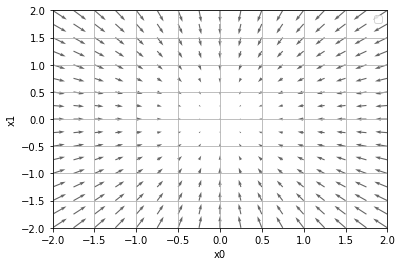

In [18]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x): #접선
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
# print("x0:", x0)
# print("x1:", x1)
X, Y = np.meshgrid(x0, x1)
# print("X:", X)
X = X.flatten()
Y = Y.flatten()
# print("X.flatten:", X)
grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

### 4.4.1 경사법(경사 하강법)


기계학습 과정의 필수 요소. 기울기를 바탕으로 손실 함수의 값을 줄여나간다.

기울기가 가리키는 방향에 정말 함수의 최솟값이 있는지는 확신할 수 없지만 그 방향으로 가야 한다는 것은 알 수 있다.

$$ x_0 = x_0 - \eta{\frac{\partial f}{\partial x_0}}$$

$$ x_1 = x_1 - \eta{\frac{\partial f}{\partial x_1}}$$

$\eta$ 는 learning_rate를 나타낸다.

In [29]:
# f 최적화 함수
# lr learning rate
# step_num 반복수 
def gradient_descent(f, init_x, learning_rate=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= learning_rate * grad
    return x

In [40]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, learning_rate=0.001, step_num=100000)

array([-6.76799177e-21,  6.75475688e-21])

In [42]:
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, learning_rate=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [43]:
# 학습률이 너무 작은 예: lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, learning_rate=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

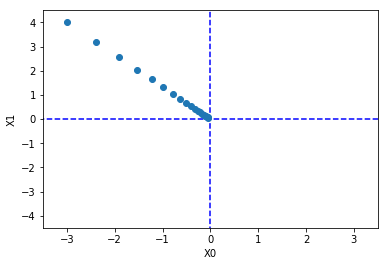

In [47]:
def gradient_descent(f, init_x, learning_rate=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= learning_rate * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])
learning_rate = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, learning_rate=learning_rate, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 4.4.2 신경망에서의 기울기

$$
\begin{equation*}
\mathbf{W} =  \begin{pmatrix}
w_{11} & w_{21} & w_{31} \\
w_{12} & w_{22} & w_{32}
\end{pmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\mathbf{\frac{\partial L}{\partial W}} =  \begin{pmatrix}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial W_{21}} & \frac{\partial L}{\partial W_{31}} \\
\frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial W_{22}} & \frac{\partial L}{\partial W_{32}}
\end{pmatrix}
\end{equation*}
$$

In [48]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

net = simpleNet()
print(net.W)

[[-0.83490298 -0.76023309 -0.76203099]
 [ 0.32208677 -1.01876678  0.85662849]]


In [53]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.21106369 -1.37302995  0.31374705]


In [56]:
softmax(p)

array([0.3329993 , 0.10418562, 0.56281508])

In [54]:
np.argmax(p)

2

In [51]:
t = np.array([0,0,1])
net.loss(x, t)

0.5748041581208783

In [52]:
dW = numerical_gradient(lambda W: net.loss(x,t), net.W)
print(dW)

[[ 0.19979958  0.06251137 -0.26231095]
 [ 0.29969937  0.09376706 -0.39346643]]


### 4.5 학습 알고리즘 구현하기
1단계. 미니배치 -> 2단계. 기울기 산출 -> 3단계. 매개변수 갱신 -> 4단계. 1~3단계 반복

하나의 입력 $x$에 대한 출력을 $d$라고 하고, 다음과 같이 입출력의 쌍이 여러 개 주어졌을 때, 

$$\{(x_1, d_1), (x_2, d_2), ..., (x_n, d_n)\}$$

이 입출력 쌍 $(x, d)$ 하나하나를 **훈련 샘플(training sample)** 이라 부르고, 그 집합을 **훈련 데이터(training data)**라고 한다.

이 때, 신경망의 가중치 $w$를 조정하여, 모든 입출력 쌍 $(x_n, d_n)(n = 1, ..., N)$ 입력 $x_n$이 주어진 신경망의 출력 $y(x_n; w)$이 최대한 $d_n$과 가까워지도록 하는 과정을 **학습**이라고 부른다


#### 4.5.1 2층 신경망 클래스 구현하기

두 개의 레이어이므로 그 구성은 다음 그림과 같다. 

![](http://neuralnetworksanddeeplearning.com/images/tikz35.png)



#### 활성화 함수
활성화 함수는 보통 실수 전체를 정의역으로 시그모이드 함수, 램프 함수, 맥스 아웃 함수 등이 있다.
- 시그모이드 함수: 실수 전체를 정의역으로, (0, 1)을 치역으로 가진다.
$$ f(u) = \frac{1}{1 + e^{-u}} $$

- 쌍곡선 정접 함수: (-1, 1)의 치역을 갖는다.
$$ f(u) = tanh(u) $$

- 램프 함수 (ramp function, rectified linear function): u < 0인 부분을 0으로 바꾼 단순 함수이다. 단순하고 계산량이 적다. 학습이 빠르고 최종결과도 더 좋은 경우가 많아 가장 많이 사용되고 있다.
$$ f(u) = max(u, 0) $$

- 맥스아웃 함수: 각각의 총 입력을 유닛별로 따로 계산한 후, 그 중한다. 최대값을 유닛의 출력으로 한다.   
$$ f(u_j) = max (u_jk) (k=1,...,K) $$

- 항등 사상: 회귀 문제를 위한 신경망에서 사용한다.
$$ f(u) = u $$

- 소프트맥스 함수: 클래스 분류를 위한 신경망에서 사용한다. 출력의 합이 항상 1이 된다. 모든 유닛의 총 입력으로부터 결정되는 점이 다른 활성화 함수와 다르다. 지수 함수에 따른 오버플로우를 방지하기 위해, 보통 입력값 중 최대값을 기준으로 정규화한다.
$$ f(u) = \frac{\exp({u_k})}{\sum_{j=1}^{k} \exp({u_j})} $$

#### 오차 함수
오차함수의 종류는 다음과 같다

| 문제의 유형 | 활성화 함수 | 오차 함수
| :- |:-----------------:| ----------------
| 회귀 | 항등사상 |   제곱 오차  
| 이진 분류 |  시그모이드 (또는 로지스틱함수) | 교차 엔트로피  
| 클래스 분류 | 소프트맥스 함수 | 교차 엔트로피

In [58]:
from common.gradient import numerical_gradient
from common.functions import *


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        # 100개의 훈련 데이터(28x28)가 들어있는 행벡터 형태를 이루는 x(100, 784)와 W1(784, 100)벡터의 내적을 구한 후, 
        # b1만큼 트랜스포밍한 벡터 a1(100, 100)를 구한다. 
        
        # 100x100에 큰 의미는 없다. 단지 은닉층의 개수만큼의 크기를 지닐 뿐이다. 
        # 은닉층이 50개의 행벡터이면 a1의 차원은 50x50이 된다.
        # 은닉층을 딥하게 더 추가할 수 있다.
        a1 = np.dot(x, W1) + b1 
        
        # a1의 출력값은 음수부터 양수까지 값이 다양한 범위를 지닌다. 따라서 다음층에 전달하기 위해 활성화 함수로 값을 변환시킨다.  
        # 시그모이드 함수는 0부터 1사이의 양수의 값으로 변환시킨다. 
        z1 = sigmoid(a1)
        
        # z1(100, 100) 벡터와 W2 (100, 10) 벡터의 내적을 구해 벡터 a2(100, 10)를 얻는다. 
        a2 = np.dot(z1, W2) + b2
        
        # 최종 레이블 분류를 위해 소프트맥스 함수를 사용한다. 
        """
        실제 사용된 함수는 같다. 
        def softmax(x)
            if x.ndim == 2: # 가중치 데이터가 2차원이면  
                x = x.T # 오버플로우를 방지하기 위해, 100개의 행벡터를 10개의 행벡터로 변환한다. (100, 10) => (10, 100)
                x = x - np.max(x, axis=0) # 오버플로우 방지, 100개의 훈련된 데이터의 각 열에서 10개의 분류값에 대한 최대값을 빼준다.
                                          # axis에 대한 numpy 개념을 알고 있어야 한다.
                y = np.exp(x) / np.sum(np.exp(x), axis=0) # 소프트맥스 공식을 적용한다.
                return y.T # (10, 100) => (100, 10) 원래대로 돌려 손실함수, 비용함수 계산시 레이블 데이터의 차원과 맞춘다. 
            x = x - np.max(x)
            return np.exp(x) / np.sum(np.exp(x))

        """
        y = softmax(a2)
        return y
        
    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        # 정답 레이블이 1일 때의 해당하는 추정치를 교차 엔트로피를 이용해 계산한다.
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x: 입력 데이터, t: 정답 레이블
    # 미분에 의한 방법: 시간이 오래 걸림
    def numerical_gradient(self, x, t):
        
        # 입력 데이터와 정답 레이블의 손실 함수를 구함
        # 매개변수로 전달받은 
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        # W1(784, 100), W2(100, 10), b1(100,), b2(10,) 등 
        # 다차원 배열로 이루어진 가중치 변수에 대해 기울기를 구한다.
        

        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    # 오차 역전파에 의한 방법
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [59]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


#### 4.5.2 미니배치 학습 구현하기

In [60]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 1000번 돌린다. 
for i in range(iters_num):
    # 600000개의 훈련데이터에서 100개를 무작위로 선택한다. 
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask] # 무작위로 선택된 100개의 입력 데이터
    t_batch = t_train[batch_mask] # 그 결과값인 100개의 레이블 데이터
    
    # 미분에 의한 기울기 벡터를 구함: 속도가 매우 느리다.
    # grad = network.numerical_gradient(x_batch, t_batch)
    
    # 오차 역전파에 의해 기울기 벡터를 구함
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        # 각각의 가중치를 초기 랜덤값에서 음의 기울기 방향으로 가중치를 갱신한다. (즉, 하강한다.)
        # 이 때 학습률(learning rate)의 값으로 갱신량을 결정한다. 오버 피팅이 발생하지 않도록 적절한 값을 산정한다.
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

#### 4.5.3 시험 데이터로 평가하기

In [61]:
import numpy as np
from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 60000개의 훈련 데이터에서 임의로 100개를 선택한다.
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train_acc: {:0.3f}, test_acc: {:0.3f}".format(train_acc, test_acc))

train_acc: 0.144, test_acc: 0.140
train_acc: 0.780, test_acc: 0.789
train_acc: 0.875, test_acc: 0.879
train_acc: 0.897, test_acc: 0.901
train_acc: 0.907, test_acc: 0.908
train_acc: 0.914, test_acc: 0.915
train_acc: 0.918, test_acc: 0.920
train_acc: 0.922, test_acc: 0.924
train_acc: 0.926, test_acc: 0.929
train_acc: 0.930, test_acc: 0.931
train_acc: 0.933, test_acc: 0.934
train_acc: 0.936, test_acc: 0.935
train_acc: 0.939, test_acc: 0.936
train_acc: 0.941, test_acc: 0.939
train_acc: 0.943, test_acc: 0.940
train_acc: 0.945, test_acc: 0.942
train_acc: 0.946, test_acc: 0.943


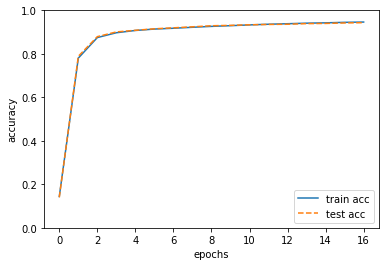

In [62]:
from matplotlib import pyplot as plt
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

![](https://i.imgur.com/fWB7vVF.png)

In [94]:
import pandas as pd

In [95]:
from sklearn.datasets import load_boston

In [96]:
dataset = load_boston()

In [97]:
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])

In [99]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [98]:
y = pd.Series(dataset['target'], name='y')

In [100]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: y, dtype: float64

Initial Point는 Cost Function을 최소화할 수 있는 상수부터 시작한다. Loss Function이 L2이거나 L1인 경우 평균을 사용

In [69]:
y_pred = y.apply(lambda x : y.mean())

일반적으로 많이 사용하는 L2-loss를 기준으로 Gradient를 구해보자
$$
L(y_i,\;γ)=\frac{1}{2}(y_i−γ)^2
$$

$$
r_{i0}=−\frac{∂L(y_i,F_0(x_i))}{∂F_0(x_i)} = (y_i−γ)
$$

(y_true - y_pred)가 학습에 쓰일 Negative Gradient 이다

In [70]:
(y - y_pred).head()

0     1.467194
1    -0.932806
2    12.167194
3    10.867194
4    13.667194
Name: y, dtype: float64

### 1번째 weak model 만들기

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
model1 = DecisionTreeRegressor(max_depth = 1, random_state=42)

In [73]:
model1.fit(X,(y-y_pred))

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [74]:
y_pred1 = model1.predict(X)

In [75]:
y_pred1[0:5]

array([-2.59908539, -2.59908539, 14.70535157, 14.70535157, 14.70535157])

**$f_1(x)$ 의 예측값을 구해보자**

In [76]:
#f_0(x)의 Loss
np.square(y - y_pred).mean()

84.4195561561656

In [77]:
#f_1(x)의 Loss
np.square(y - (y_pred+y_pred1)).mean()

46.19909167710846

**여기에 learning_rate를 추가하면 아래와 같이 된다**

In [78]:
#f_1(x)의 Loss
learning_rate = 0.1

np.square(y - (y_pred+ learning_rate * y_pred1)).mean()

77.15766790514465

**논문 등에서는 y_pred1에 무엇을 곱해야 최적일지를 gradient descent로 찾아 넣고 거기다가 learning rate를 곱한다**

하지만, 대부분의 (쉬운, 학습용)구현체는 그냥 learning_rate만을 곱함

$$
λ_0=argmin_λ∑^3_{i=1}L(y_i,F_0(x_i)+λh_0(x_i))
$$

$$
E=\sum_i (y_i - (F_0(x_i)+\lambda h_0(x_i)))^2
$$


$$
\frac{\partial E}{\partial \lambda} = 2 \sum_i (y_i - (F_0(x_i)+\lambda h_0(x_i)))\cdot h_0(x_i)
$$

## 2번째 weak model 만들기

In [79]:
model2 = DecisionTreeRegressor(max_depth=1)

In [80]:
model2.fit(X, (y-(y_pred + learning_rate * y_pred1)))

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [81]:
y_pred2 = model2.predict(X)

이제 단계별 MSE를 비교해보자.

In [82]:
np.square(y-y_pred).mean()

84.4195561561656

In [83]:
np.square(y-(y_pred+ learning_rate * y_pred1)).mean()

77.15766790514465

In [84]:
np.square(y-(y_pred+ learning_rate * y_pred1 + learning_rate * y_pred2)).mean()

70.66315156674236

계속 MSE가 개선되고 있음을 알 수 있다.

### Loss Function이 L1-loss인 경우

$$
L(y_i,\;γ)=\left | y_i−γ \right |
$$

$$
r_{i0}=−\frac{∂L(y_i,F_0(x_i))}{∂F_0(x_i)} = sign(y_i−γ)
$$

Loss function의 미분함수는 sign 함수이다.

초기값은 평균으로 그대로 이용한다

In [85]:
y_pred[:5]

0    22.532806
1    22.532806
2    22.532806
3    22.532806
4    22.532806
Name: y, dtype: float64

In [101]:
np.sign(y-y_pred)

0      1.0
1     -1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8     -1.0
9     -1.0
10    -1.0
11    -1.0
12    -1.0
13    -1.0
14    -1.0
15    -1.0
16     1.0
17    -1.0
18    -1.0
19    -1.0
20    -1.0
21    -1.0
22    -1.0
23    -1.0
24    -1.0
25    -1.0
26    -1.0
27    -1.0
28    -1.0
29    -1.0
      ... 
476   -1.0
477   -1.0
478   -1.0
479   -1.0
480    1.0
481    1.0
482    1.0
483   -1.0
484   -1.0
485   -1.0
486   -1.0
487   -1.0
488   -1.0
489   -1.0
490   -1.0
491   -1.0
492   -1.0
493   -1.0
494    1.0
495    1.0
496   -1.0
497   -1.0
498   -1.0
499   -1.0
500   -1.0
501   -1.0
502   -1.0
503    1.0
504   -1.0
505   -1.0
Name: y, Length: 506, dtype: float64

In [86]:
model1.fit(X, np.sign(y-y_pred))

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [102]:
y_pred1 = model1.predict(X)

In [103]:
y_pred1

array([ 0.84516129, -0.62393162,  0.84516129,  0.84516129,  0.84516129,
        0.84516129, -0.62393162, -0.62393162, -0.62393162, -0.62393162,
       -0.62393162, -0.62393162, -0.62393162, -0.62393162, -0.62393162,
       -0.62393162,  0.84516129, -0.62393162, -0.62393162, -0.62393162,
       -0.62393162, -0.62393162, -0.62393162, -0.62393162, -0.62393162,
       -0.62393162, -0.62393162, -0.62393162, -0.62393162, -0.62393162,
       -0.62393162, -0.62393162, -0.62393162, -0.62393162, -0.62393162,
       -0.62393162, -0.62393162, -0.62393162, -0.62393162,  0.84516129,
        0.84516129,  0.84516129,  0.84516129,  0.84516129, -0.62393162,
       -0.62393162, -0.62393162, -0.62393162, -0.62393162, -0.62393162,
       -0.62393162, -0.62393162,  0.84516129, -0.62393162, -0.62393162,
        0.84516129,  0.84516129,  0.84516129,  0.84516129, -0.62393162,
       -0.62393162, -0.62393162,  0.84516129, -0.62393162, -0.62393162,
        0.84516129, -0.62393162, -0.62393162, -0.62393162, -0.62

In [88]:
learning_rate = 1

In [89]:
#0번째 모델의 MAE
np.abs(y-y_pred).mean()

6.64720742395601

In [90]:
#1번째 모델의 MAE
np.abs(y-(y_pred+ learning_rate * y_pred1)).mean()

6.19191396881167

### 2번째 model 만들기

In [179]:
model2.fit(X, np.sign(y-(y_pred+ learning_rate * y_pred1)))

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [180]:
y_pred2 = learning_rate * model2.predict(X)

In [181]:
#1번째 모델의 MAE
np.abs(y-(y_pred+ learning_rate * y_pred1 + learning_rate * y_pred2)).mean()

5.814779161577758

![](../DS_School/Machine_learning_inaction/decision_tree_images/gradient-boosting-movie.gif)